In [39]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans, AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer, silhouette_visualizer
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.metrics import silhouette_score   
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.cluster import DBSCAN
import seaborn as sns

# [Clustering](https://scikit-learn.org/stable/modules/clustering.html#k-means)

Cada algoritmo de agrupamento vem em duas variantes: uma classe, que implementa o método __fit__ de ajuste para aprender os agrupamentos em dados de treinamento e uma função que, dados dados de treinamento, retorna uma matriz de rótulos de inteiros correspondentes aos diferentes agrupamentos. Para a turma, os rótulos nos dados de treinamento podem ser encontrados no atributo labels_.

## Métodos de Clustering

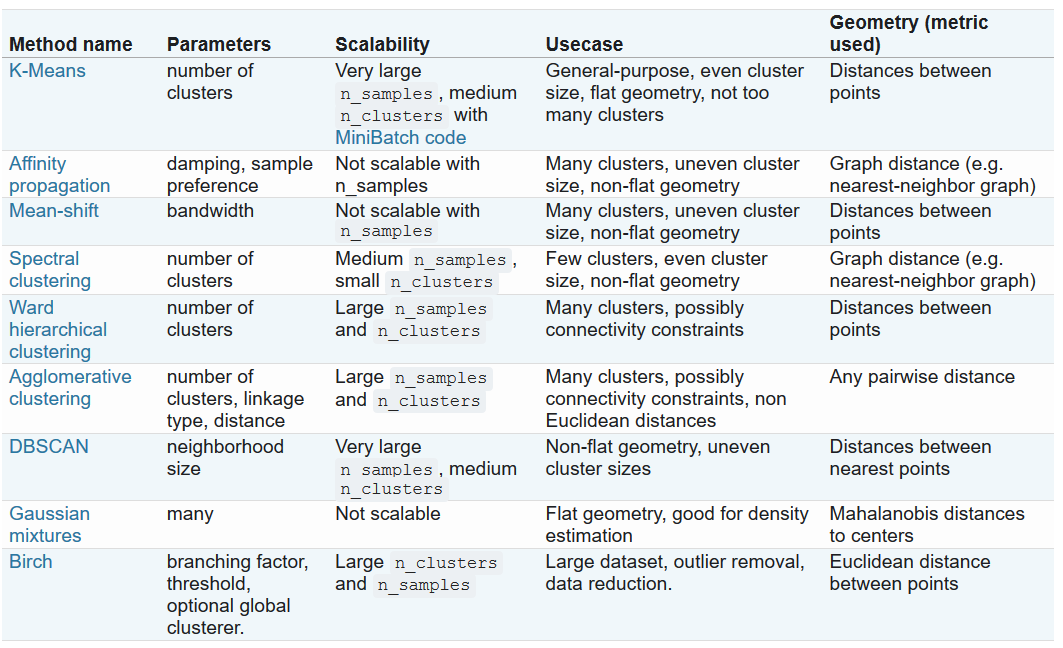

# K-Means

In [40]:
# preparando o plot em 3-D
from mpl_toolkits.mplot3d import Axes3D

# preparando o tamanho do plot
plt.rcParams['figure.figsize'] = (20, 14)

In [41]:

# Criando um sample dataset com 4 clusters
X, y = make_blobs(n_samples=800, n_features=3, centers=4, random_state=123)

C:\Users\georg\AppData\Local\Temp/ipykernel_13200/3503476572.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


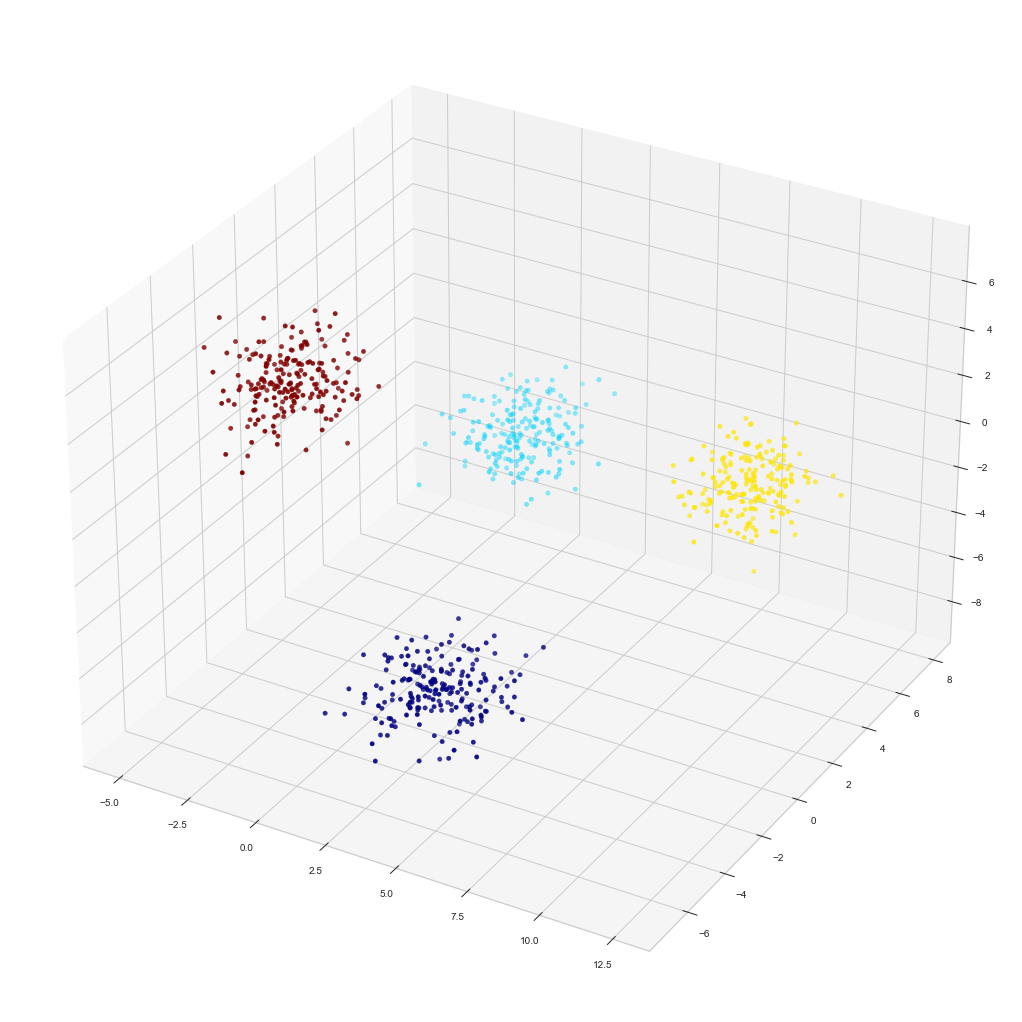

In [42]:
fig = plt.figure()
ax = Axes3D(fig)
plt.set_cmap('jet')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)

In [43]:

# Initializing KMeans
kmeans = KMeans(n_clusters=4)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

c:\Users\georg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [44]:
x_df = pd.DataFrame(X, columns=['X', 'Y', 'Z'])

In [45]:
x_df['clusters'] = labels

In [46]:
cluster0 = x_df[ x_df['clusters'] == 0 ]
cluster1 = x_df[ x_df['clusters'] == 1 ]

Cluster  1
[-2.10872876 -3.06868236  4.66812604]
Cluster  2
[ 9.59804372  3.64965739 -0.36885258]
Cluster  3
[ 3.92641951 -4.32154363 -5.42941397]
Cluster  4
[ 0.97539985  4.3661875  -1.61345723]


C:\Users\georg\AppData\Local\Temp/ipykernel_13200/3045117888.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


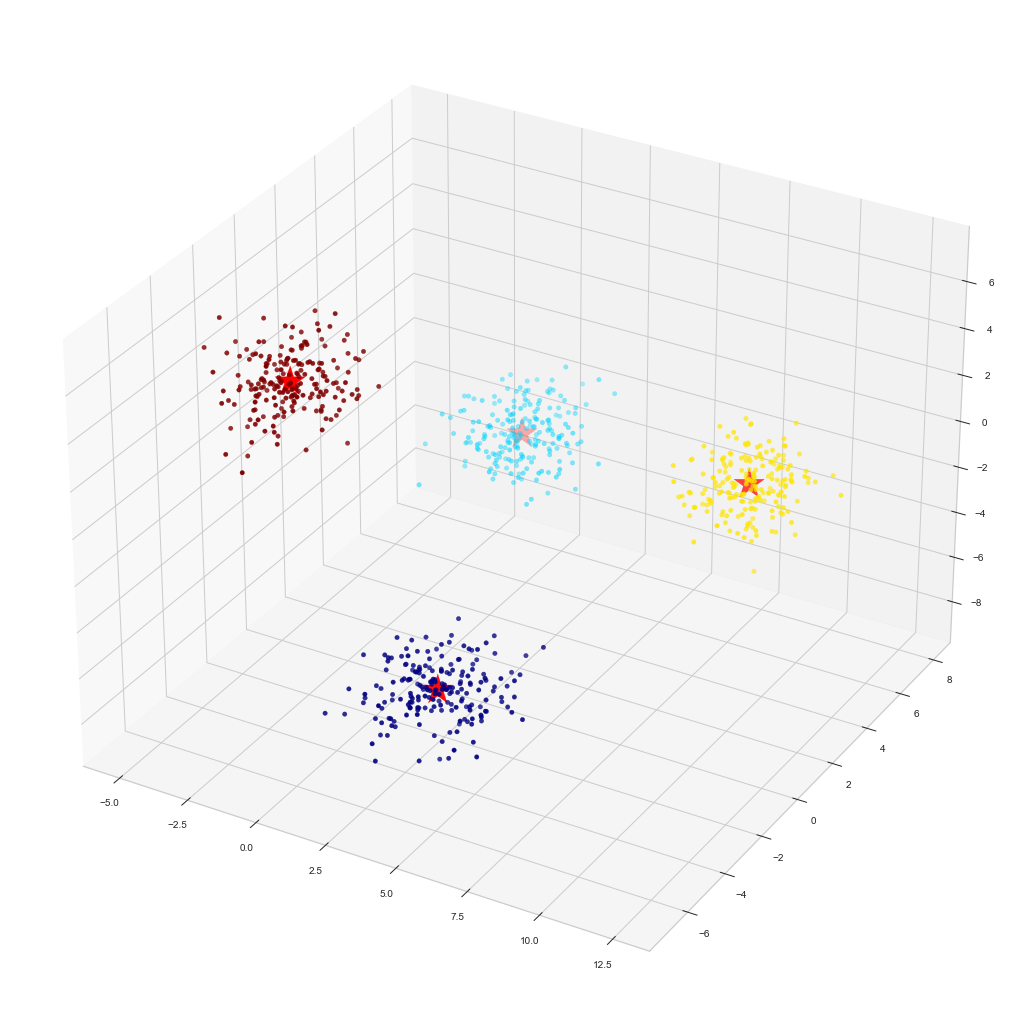

In [47]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='red', s=1000)
counter = 1
for cluster in C:
    print('Cluster ',counter)
    print(cluster)
    counter += 1

## 'K' Choice

### Elbow

c:\Users\georg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


1 39683.87351162199


c:\Users\georg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


2 22037.327853627587


c:\Users\georg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


3 9913.518408958922


c:\Users\georg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


4 2272.27406549435


c:\Users\georg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


5 2105.253863848703


c:\Users\georg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


6 1975.9779955417619


c:\Users\georg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


7 1867.1904449871768


c:\Users\georg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


8 1733.5675169740823


c:\Users\georg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


9 1658.705571195119


c:\Users\georg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


10 1536.1355327648553


Text(0, 0.5, 'WSS')

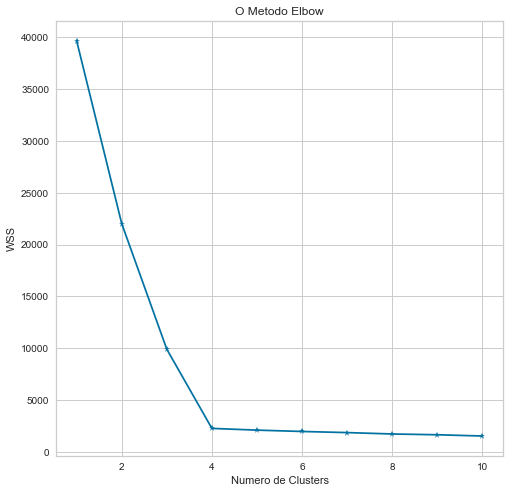

In [48]:
plt.figure(figsize=(8,8))

# plotando o gráfico do método elbow
wcss = []
 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(X)
    print (i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss,'*-')
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares

### Silhouette Score


In [49]:
sillhoute_scores = []
n_cluster_list = np.arange(2,31).astype(int)

for n_cluster in n_cluster_list:
    kmeans = KMeans(n_clusters=n_cluster)
    cluster_found = kmeans.fit_predict(X)
    sillhoute_scores.append(silhouette_score(X, kmeans.labels_))

c:\Users\georg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\georg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\georg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\georg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

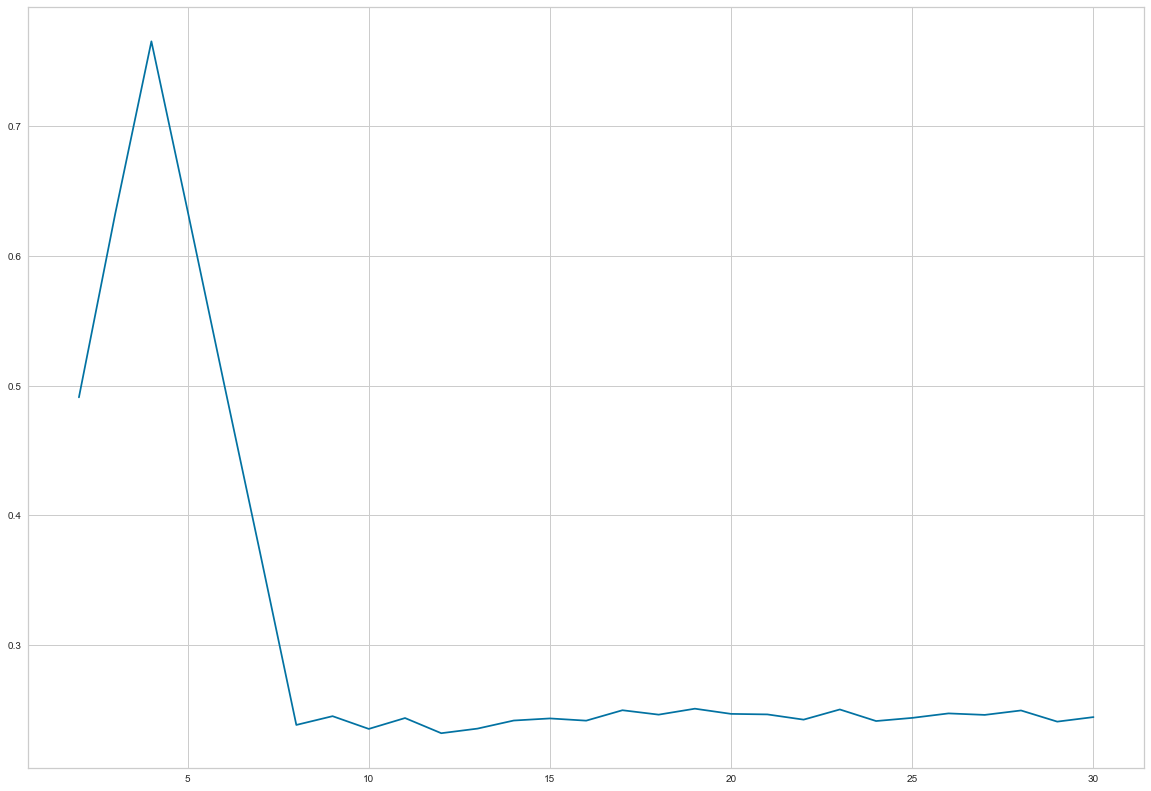

In [50]:
plt.plot(n_cluster_list,sillhoute_scores)
plt.show()

c:\Users\georg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\georg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\georg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\georg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

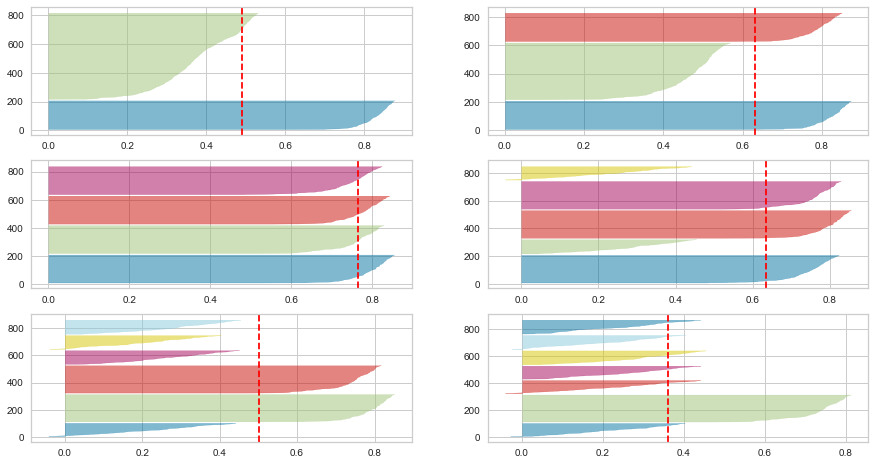

In [51]:
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)  

# DBSCAN

c:\Users\georg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


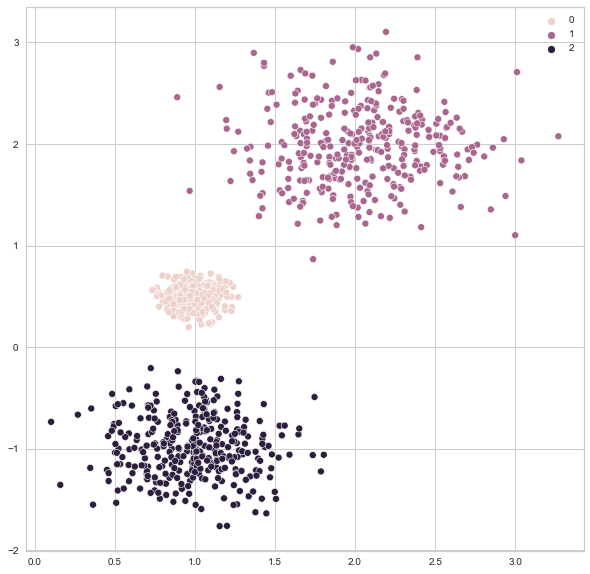

In [52]:
centers = [[1, 0.5], [2, 2], [1, -1]]
stds = [0.1, 0.4, 0.3]
X, labels_true = make_blobs(n_samples=1000, centers=centers, cluster_std=stds, random_state=0)
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(X[:,0], X[:,1], hue=labels_true)
plt.show()

c:\Users\georg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


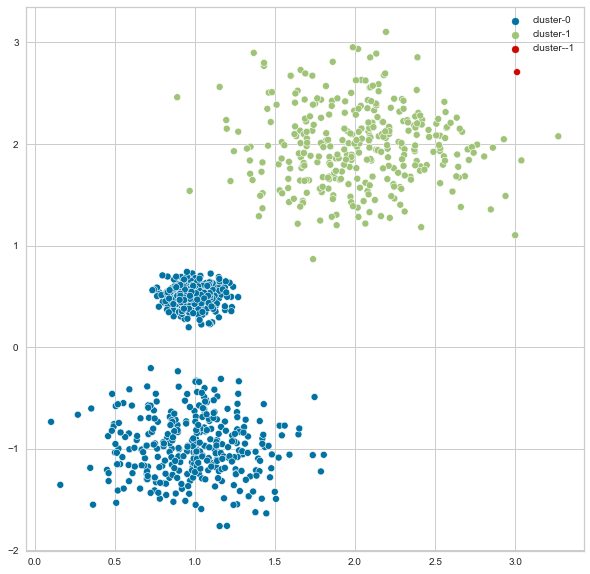

In [53]:
db = DBSCAN(eps=0.5, min_samples=3).fit(X)
labels = db.labels_
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(X[:,0], X[:,1], hue=["cluster-{}".format(x) for x in labels])
plt.show()

1.0
0.5
0.3333333333333333
0.25


c:\Users\georg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\georg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\georg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\georg\anacond

0.2
0.16666666666666666
0.14285714285714285
0.125


c:\Users\georg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\georg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\georg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\georg\anacond

0.1111111111111111
0.1


c:\Users\georg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\georg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


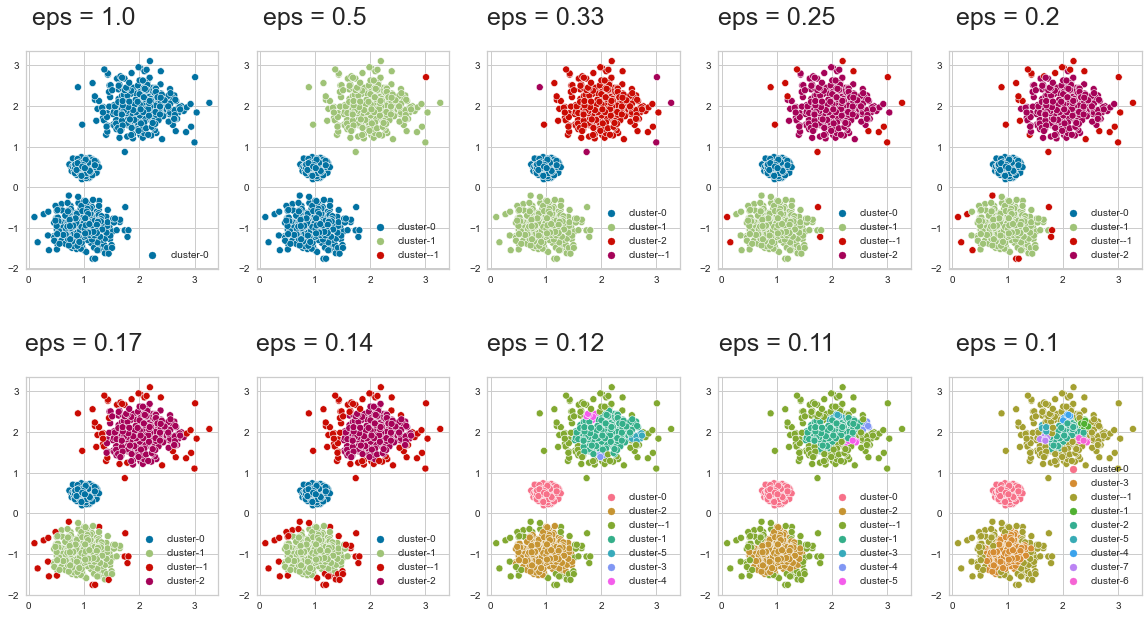

In [54]:
fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(hspace=.5, wspace=.2)
i = 1
for x in range(10, 0, -1):
    eps = 1/(11-x)
    db = DBSCAN(eps=eps, min_samples=10).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    
    print(eps)
    ax = fig.add_subplot(2, 5, i)
    ax.text(1, 4, "eps = {}".format(round(eps, 2)), fontsize=25, ha="center")
    sns.scatterplot(X[:,0], X[:,1], hue=["cluster-{}".format(x) for x in labels])
    
    i += 1

# Agrupamento Hierárquico

In [55]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans, AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer, silhouette_visualizer
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [56]:
df = pd.read_csv('https://raw.githubusercontent.com/abnr/ml-data/main/dataset1.csv')

In [57]:
pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')), ('scaler', MinMaxScaler())])

In [58]:
X  = df.drop('CUST_ID', axis=1)

In [59]:
X1 = pipe.fit_transform(X)

In [60]:
dist_matrix = sch.linkage(X1, method='ward', metric = 'euclidean')

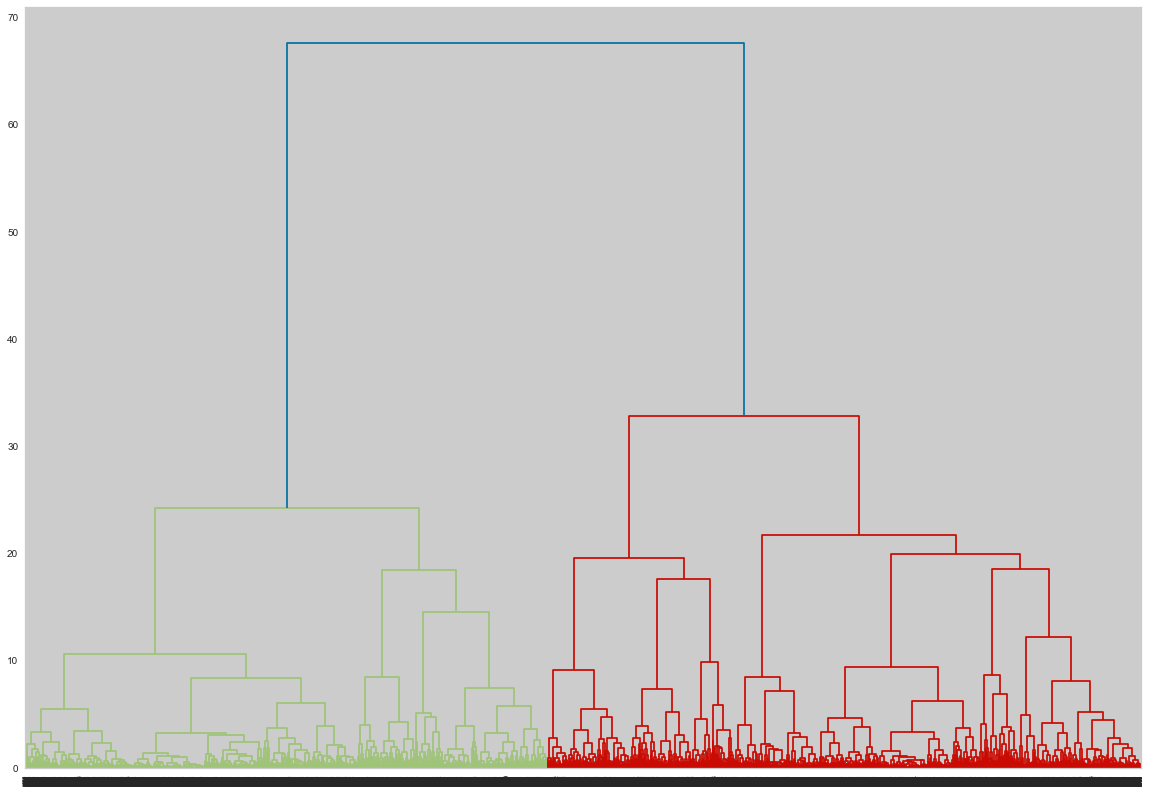

In [61]:
dn = sch.dendrogram(dist_matrix)

In [62]:
df['cluster hier'] = sch.fcluster(dist_matrix, 4, criterion='maxclust')
df.groupby('cluster hier').agg(PURCHASES_mean=('PURCHASES', 'mean'),
                                 CREDIT_LIMIT_mean=('CREDIT_LIMIT', 'mean'),
                                 PURCHASES_FREQUENCY_mean=('PURCHASES_FREQUENCY', 'mean'),
                                 PAYMENTS=('PAYMENTS', 'mean'),
                                 Count=('cluster hier', 'count'))

,PURCHASES_mean,CREDIT_LIMIT_mean,PURCHASES_FREQUENCY_mean,PAYMENTS,Count
cluster hier,,,,,
1,215.787473,4317.968457,0.090182,1513.579862,2663
2,333.183320,3773.018962,0.130677,1483.690001,1524
3,3072.883121,6757.904091,0.854320,3259.669835,1509
4,1001.625449,3926.887824,0.817505,1321.754444,3254


### Elbow e Kmeans

In [63]:
distortions=[]
for i in range (1,15):
    km=KMeans(n_clusters= i,
              n_init=5,  # run 5 times with different random inicial centroids
              max_iter=500,  # max iteration by run
              random_state=1)
    km.fit(X1)
    distortions.append(km.inertia_)  # inertia = within-cluster sum-of-squares 

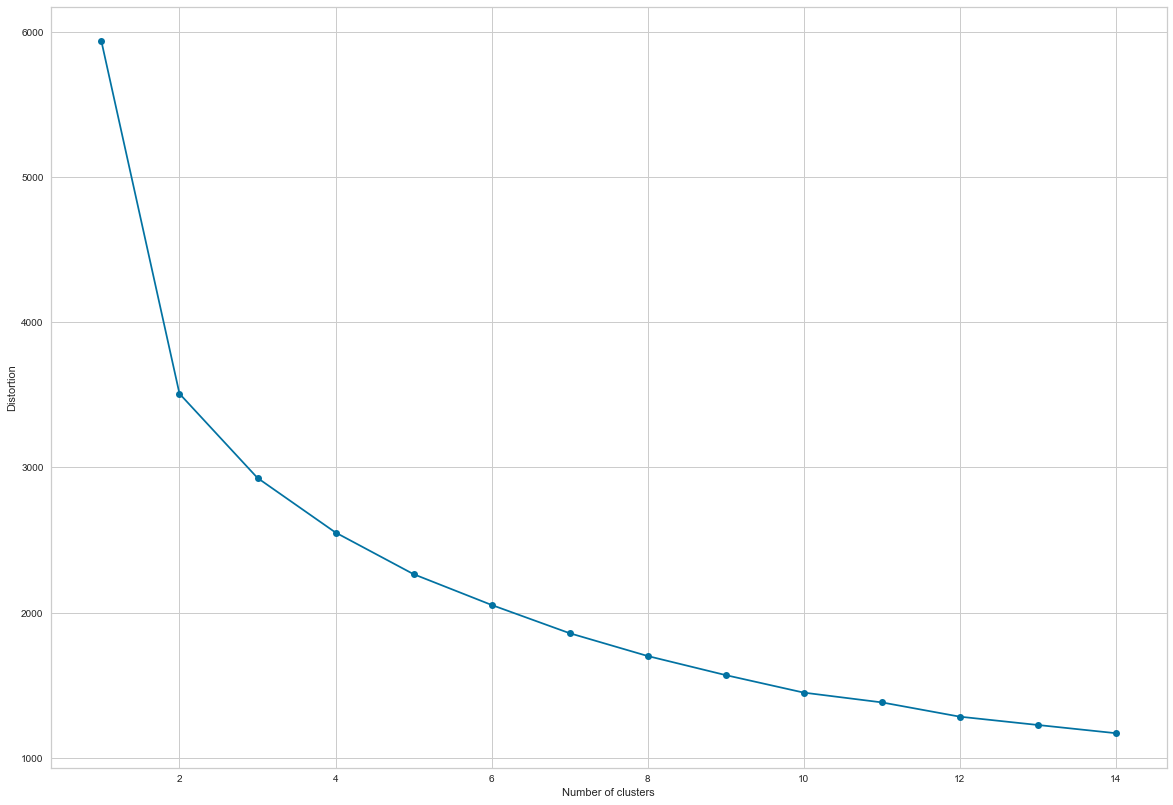

In [64]:
plt.plot(range(1,15), distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

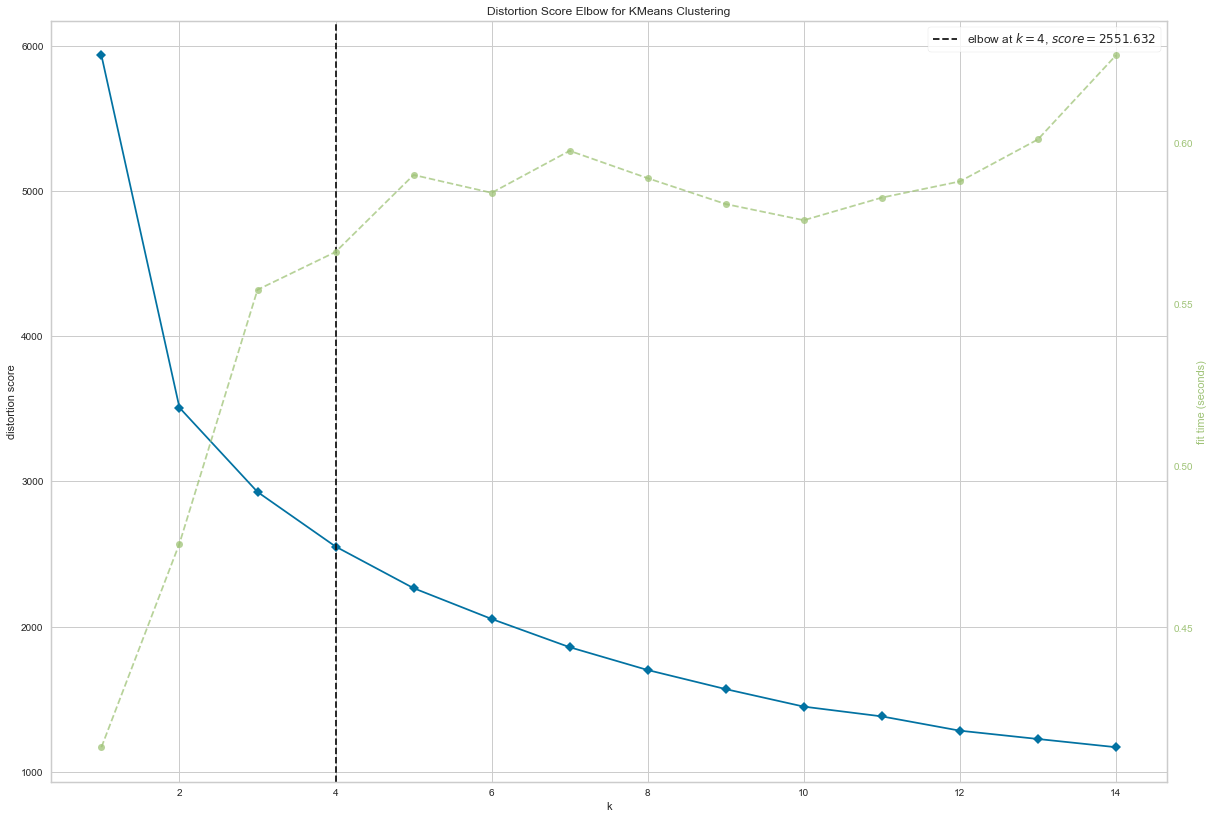

In [65]:
vis=KElbowVisualizer(km, k=(1, 15))
vis.fit(X1)
vis.show();

In [66]:
km= KMeans(n_clusters= 4,
          n_init=5, 
          max_iter= 500,
          random_state=1)

In [67]:
df['cluster kmeans']= km.fit_predict(X1)
df.groupby('cluster kmeans').agg(PURCHASES_mean=('PURCHASES', 'mean'),
                                 CREDIT_LIMIT_mean=('CREDIT_LIMIT', 'mean'),
                                 PURCHASES_FREQUENCY_mean=('PURCHASES_FREQUENCY', 'mean'),
                                 PAYMENTS=('PAYMENTS', 'mean'),
                                 Count=('cluster hier', 'count'))

,PURCHASES_mean,CREDIT_LIMIT_mean,PURCHASES_FREQUENCY_mean,PAYMENTS,Count
cluster kmeans,,,,,
0,292.021239,4223.231354,0.136549,1488.434057,3649
1,3248.394294,6768.685644,0.901399,3268.235720,1402
2,1091.990584,3952.725337,0.883255,1419.406459,2687
3,350.388003,3880.748693,0.208995,1389.711193,1212


In [68]:
metrics.silhouette_score(X1, df['cluster kmeans'])

0.32151021971955435

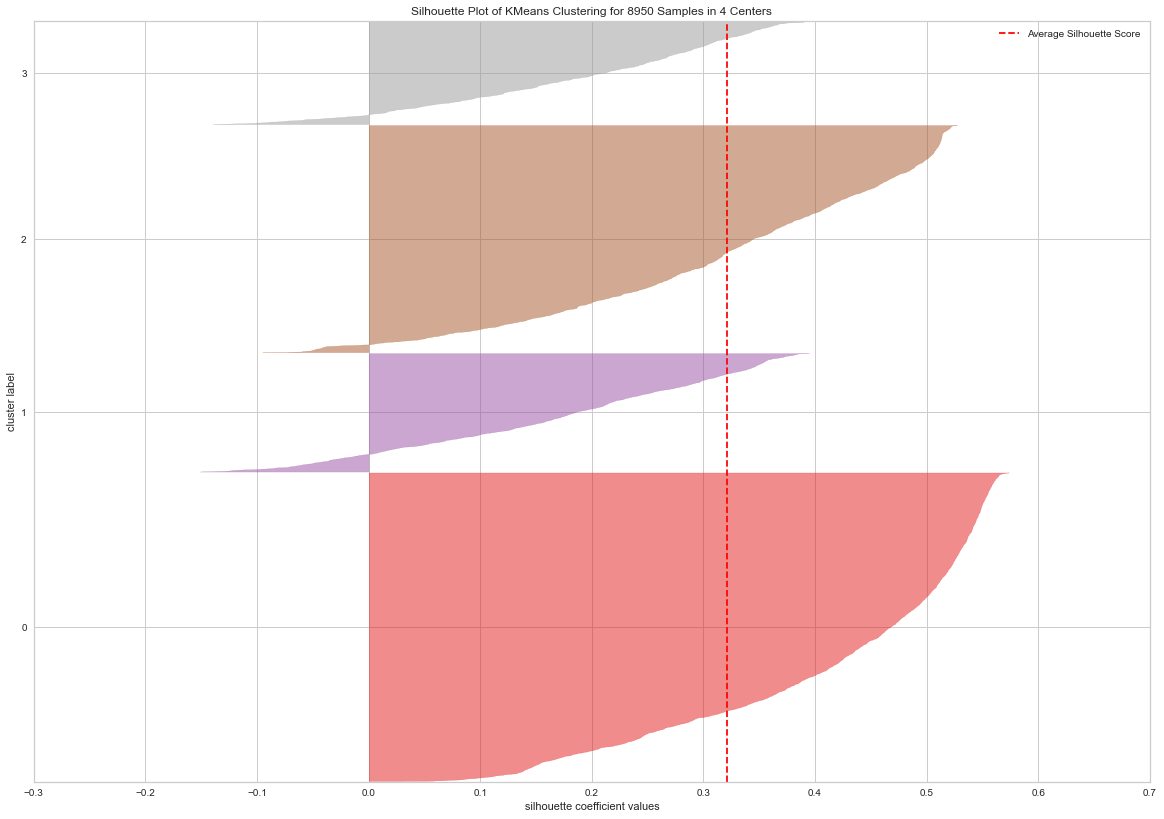

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 8950 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     estimator=KMeans(max_iter=500, n_clusters=4, n_init=5,
                                      random_state=1))

In [69]:
vis = silhouette_visualizer(km, X1)
vis